In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,roc_curve, roc_auc_score,auc
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt
from IPython.display import display
#from pycaret .classification import *

In [2]:
dtypes = {  'Regiao': 'object',
            'UF': 'object', 
            'CNAE': 'object',
            'Atendida':'bool',
            'CodAssunto': 'object',
            'SexoConsumidor': 'object',
            'FaixaEtaria': 'object',
            'CEP': 'object',
            'InscritoDAU':'bool'}

In [3]:
df_ml1 = pd.read_csv(r'C:\Users\73594253368\Desktop\Curso\Datasets\Procon\dataset_tratado.csv',dtype=dtypes)

In [4]:
df_ml1 = df_ml1[['Regiao','UF','CNAE','Atendida','CodAssunto','SexoConsumidor','FaixaEtaria','CEP','InscritoDAU']]

In [5]:
# Este df_ml1 foi a primeira tentativa. Manteremos esse data frame para testes demonstrativos no apêndice deste notebook
# Para o ML "oficial", copiaremos esse df_ml1 para o df_ml
df_ml = df_ml1

In [6]:
df_ml

,Regiao,UF,CNAE,Atendida,CodAssunto,SexoConsumidor,FaixaEtaria,CEP,InscritoDAU
0,Norte,RO,6120501.0,False,187.0,M,5,76824042.0,True
1,Norte,RO,3514000.0,False,185.0,M,4,76824322.0,False
2,Norte,RO,8599604.0,True,236.0,M,3,78932000.0,False
3,Norte,RO,6120501.0,True,187.0,M,5,78932000.0,True
4,Norte,RO,6493000.0,False,57.0,M,6,76821331.0,True
...,...,...,...,...,...,...,...,...,...
10514,Sudeste,SP,6110801.0,True,187.0,F,4,9617000.0,True
10515,Norte,RO,6143400.0,True,259.0,M,2,76940000.0,False
10516,Norte,RO,6422100.0,False,63.0,F,6,76990000.0,True
10517,Norte,RO,3514000.0,False,185.0,F,4,76807400.0,False


In [7]:
# Demonstração do desbalanceamento na variável "target"
df_ml['Atendida'].value_counts()

True     6306
False    4213
Name: Atendida, dtype: int64

# Aplicando SMOTE

# Data Preparation
As variáveis preditoras mais importantes do nosso dataset são as categóricas. Assim, como etapa preparatória do SMOTE, temos que criar variáveis dummies. Testamos, antes, com SMOTE  e sem dummies e, também, o tradicional dummies sem SMOTE. Igualmente testamos LabelEncoder + dummies + SMOTE. Os melhores resultados de acurária e recall foram com o procedimento a seguir.
 


In [8]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10519 entries, 0 to 10518
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Regiao          10519 non-null  object
 1   UF              10519 non-null  object
 2   CNAE            10519 non-null  object
 3   Atendida        10519 non-null  bool  
 4   CodAssunto      10519 non-null  object
 5   SexoConsumidor  10519 non-null  object
 6   FaixaEtaria     10519 non-null  object
 7   CEP             10519 non-null  object
 8   InscritoDAU     10519 non-null  bool  
dtypes: bool(2), object(7)
memory usage: 595.9+ KB


In [9]:
df_ml = pd.get_dummies(df_ml[['Regiao', 
                          'UF',                         
                          'CNAE',
                          'Atendida',                     
                          'CodAssunto',
                          'SexoConsumidor',
                          'FaixaEtaria',
                          'CEP','InscritoDAU']])

In [10]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10519 entries, 0 to 10518
Columns: 6928 entries, Atendida to CEP_9990244.0
dtypes: bool(2), uint8(6926)
memory usage: 69.5 MB


In [11]:
df_ml.shape

(10519, 6928)

# SMOTE após dummies

In [12]:
X = df_ml.drop(['Atendida'],axis=1) 
y = df_ml.Atendida
smt = SMOTE()
X_os,y_os = smt.fit_sample(X,y) #os de oversampled
counter = Counter(y_os)
print(counter)

Counter({False: 6306, True: 6306})


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


True     6306
False    6306
Name: Atendida, dtype: int64


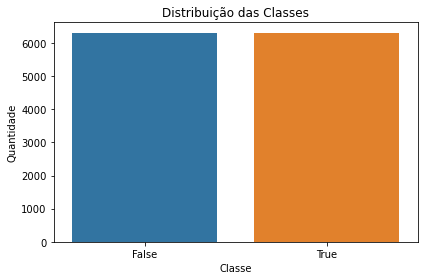

In [13]:
#grafico da nova distribuição de classes
fig, ax = plt.subplots()
sns.countplot(y_os, ax=ax)
ax.set_title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.tight_layout();

#print do balanceamento
print(pd.Series(y_os).value_counts())

In [14]:
#Train_test_split nessa oversampled
#Especificamos o tamanho do test_size = 0.3 pq assim as True/False do ytreinamento e as True/False do yteste ficam iguais 
xtreinamento, xteste, ytreinamento, yteste = train_test_split(X_os, y_os, test_size = 0.3, stratify=y_os,random_state = 0) 

In [15]:
xtreinamento

,InscritoDAU,Regiao_Centro-oeste,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul,UF_CE,UF_ES,UF_GO,UF_MG,...,CEP_9910650.0,CEP_9920110.0,CEP_9931050.0,CEP_9940460.0,CEP_9942030.0,CEP_9942098.0,CEP_9950300.0,CEP_9963370.0,CEP_9980460.0,CEP_9990244.0
11454,False,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8765,False,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3191,False,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2792,False,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9375,True,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12177,True,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8964,True,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4682,False,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5278,False,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
xteste

,InscritoDAU,Regiao_Centro-oeste,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul,UF_CE,UF_ES,UF_GO,UF_MG,...,CEP_9910650.0,CEP_9920110.0,CEP_9931050.0,CEP_9940460.0,CEP_9942030.0,CEP_9942098.0,CEP_9950300.0,CEP_9963370.0,CEP_9980460.0,CEP_9990244.0
6594,False,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6068,False,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3782,False,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772,False,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,False,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9219,True,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,False,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4719,False,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,False,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
ytreinamento.value_counts()

True     4414
False    4414
Name: Atendida, dtype: int64

True     4414
False    4414
Name: Atendida, dtype: int64


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


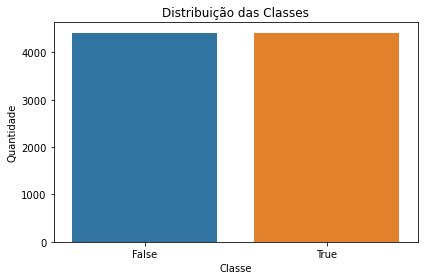

In [18]:
fig, ax = plt.subplots()
sns.countplot(ytreinamento, ax=ax)
ax.set_title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.tight_layout();

#print do balanceamento
print(pd.Series(ytreinamento).value_counts())

In [19]:
yteste.value_counts()

True     1892
False    1892
Name: Atendida, dtype: int64

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


True     4414
False    4414
Name: Atendida, dtype: int64


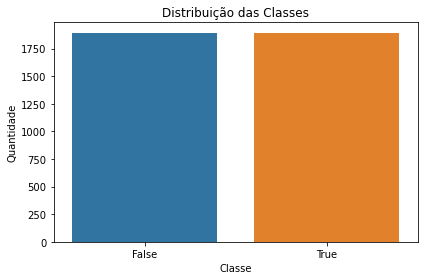

In [20]:
fig, ax = plt.subplots()
sns.countplot(yteste, ax=ax)
ax.set_title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.tight_layout();

#print do balanceamento
print(pd.Series(ytreinamento).value_counts())

In [21]:
#Neste ponto do notebook, as bases do "df_ml" estão balanceadas pelo SMOTE e separadas em treino e teste

# PyCaret preparatório
Temos as bases balanceadas e já separadas no train_test_split. Todavia, não sabemos qual modelo de machine learning aplicar. Utilizaremos a ferramenta de automação de machine learning Pycaret apenas como guia para escolher os melhores algoritmos para implementação manual.

A documentação do PyCaret dispõe que, ao utilizar o parâmetro fix_imbalance=True, a biblioteca aplica, automaticamente, a técnica  SMOTE. Dessa forma, não há necessidade de aplicar as bases balanceadas por SMOTE, às quais preparamos para o ML manual. Assim, utilizaremos, no PyCaret, a base "df_ml1". Como haverá
SMOTE automático, a ml1 será semelhante à "df_ml" submetida ao SMOTE

In [22]:
#PyCaret no automático mas com fix_imbalance=True
#pycaret_df_ml = setup(data = ml1, target='Atendida',fix_imbalance=True)
#modelsml1 = compare_models()
#resultsml1 = pull()

#Resultado do PyCaret:
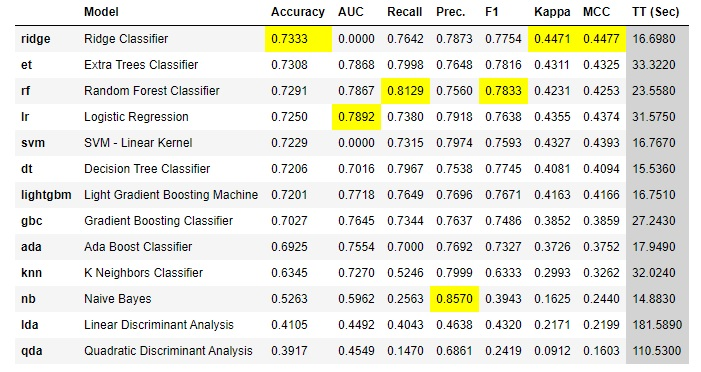

#  ML manual a partir dos melhores modelos que prospectamos com o PyCaret: et, rf e lr. Privilegiando o recall e, também, para variar dos modelos de árvore, colocamos, também, o lightgbm. Plotamos Matriz de Confusão e grafico de ROC e AUC.

In [23]:
#Retomamos os train_test_split a partir do oversample ("_os") que já tínhamos feito

In [29]:
# Modelo Extra Trees Classifier
et = ExtraTreesClassifier(random_state=0)
et = et.fit(xtreinamento, ytreinamento)
Train_predict_et = et.predict(xteste)
print("Accuracy Score:", accuracy_score(yteste, Train_predict_et))
print(classification_report(yteste, Train_predict_et))

Accuracy Score: 0.7457716701902748
              precision    recall  f1-score   support

       False       0.70      0.86      0.77      1892
        True       0.82      0.63      0.71      1892

    accuracy                           0.75      3784
   macro avg       0.76      0.75      0.74      3784
weighted avg       0.76      0.75      0.74      3784



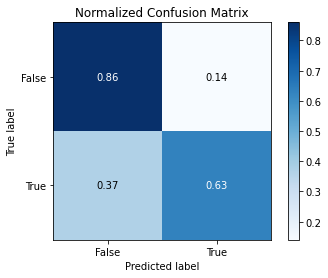

In [30]:
#Matriz de Confusão
skplt.metrics.plot_confusion_matrix(yteste, Train_predict_et, normalize=True)
plt.show()

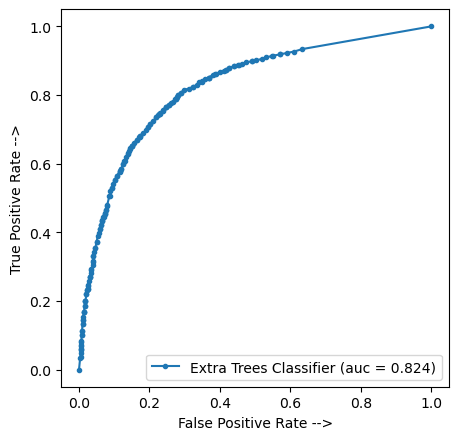

In [31]:
# Curva ROC e área abaixo da curva (AUC)
y_pred_et = et.predict_proba(xteste)
et_fpr,et_tpr,thereshold = roc_curve(yteste,y_pred_et[:,1]) 
auc_et = auc(et_fpr,et_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(et_fpr,et_tpr, marker='.', label='Extra Trees Classifier (auc = %0.3f)' % auc_et)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [32]:
# Modelo Logistic Regression
lr = LogisticRegression(random_state=0)
lr = lr.fit(xtreinamento, ytreinamento)
Train_predict_lr = lr.predict(xteste)
print("Accuracy Score:", accuracy_score(yteste, Train_predict_lr))
print(classification_report(yteste, Train_predict_lr))

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.7618921775898521
              precision    recall  f1-score   support

       False       0.76      0.77      0.76      1892
        True       0.76      0.76      0.76      1892

    accuracy                           0.76      3784
   macro avg       0.76      0.76      0.76      3784
weighted avg       0.76      0.76      0.76      3784



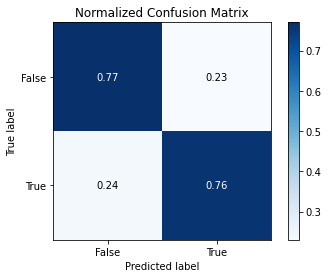

In [33]:
skplt.metrics.plot_confusion_matrix(yteste, Train_predict_lr, normalize=True)
plt.show()

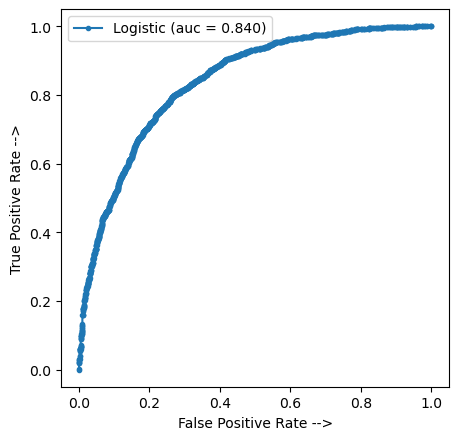

In [34]:
Y_pred_lr=lr.decision_function(xteste)
logistic_fpr,logistic_tpr,thereshold = roc_curve(yteste,Y_pred_lr) # Y_pred_lr do decision_function() acima
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [35]:
# Modelo Light Gradient Boosting Machine
import lightgbm
from lightgbm import LGBMClassifier
lightgbm = LGBMClassifier(random_state=0)
lightgbm = lightgbm.fit(xtreinamento, ytreinamento)
Train_predict_lightgbm = lightgbm.predict(xteste)
print("Accuracy Score:", accuracy_score(yteste, Train_predict_lightgbm))
print(classification_report(yteste, Train_predict_lightgbm))

Accuracy Score: 0.7418076109936576
              precision    recall  f1-score   support

       False       0.74      0.75      0.74      1892
        True       0.75      0.73      0.74      1892

    accuracy                           0.74      3784
   macro avg       0.74      0.74      0.74      3784
weighted avg       0.74      0.74      0.74      3784



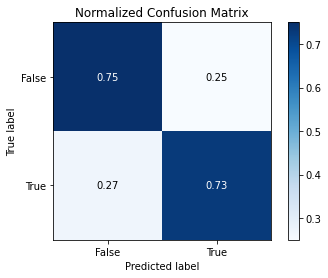

In [36]:
skplt.metrics.plot_confusion_matrix(yteste, Train_predict_lightgbm, normalize=True)
plt.show()

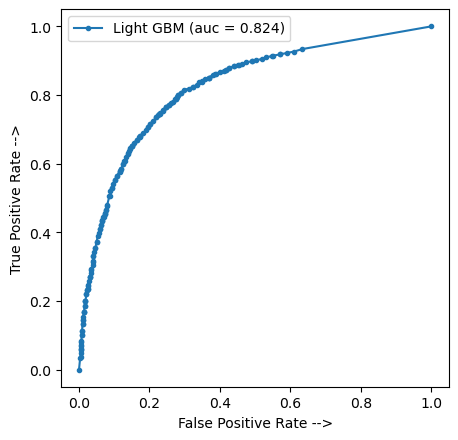

In [37]:
y_pred_lightgbm = lightgbm.predict_proba(xteste)
lightgbm_fpr,lightgbm_tpr,thereshold = roc_curve(yteste,y_pred_et[:,1]) 
auc_lightgbm = auc(lightgbm_fpr,lightgbm_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lightgbm_fpr,lightgbm_tpr, marker='.', label='Light GBM (auc = %0.3f)' % auc_lightgbm)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [43]:
# Comparativo dos três modelos
print("EXTRA TREES CLASSIFIER:")
print("Accuracy Score:", accuracy_score(yteste, Train_predict_et))
print(classification_report(yteste, Train_predict_et))
print("REGRESSÃO LOGÍSTICA:")
print("Accuracy Score:", accuracy_score(yteste, Train_predict_lr))
print(classification_report(yteste, Train_predict_lr))
print("LIGHTGBM:")
print("Accuracy Score:", accuracy_score(yteste, Train_predict_lightgbm))
print(classification_report(yteste, Train_predict_lightgbm))

EXTRA TREES CLASSIFIER:
Accuracy Score: 0.7457716701902748
              precision    recall  f1-score   support

       False       0.70      0.86      0.77      1892
        True       0.82      0.63      0.71      1892

    accuracy                           0.75      3784
   macro avg       0.76      0.75      0.74      3784
weighted avg       0.76      0.75      0.74      3784

REGRESSÃO LOGÍSTICA:
Accuracy Score: 0.7618921775898521
              precision    recall  f1-score   support

       False       0.76      0.77      0.76      1892
        True       0.76      0.76      0.76      1892

    accuracy                           0.76      3784
   macro avg       0.76      0.76      0.76      3784
weighted avg       0.76      0.76      0.76      3784

LIGHTGBM:
Accuracy Score: 0.7418076109936576
              precision    recall  f1-score   support

       False       0.74      0.75      0.74      1892
        True       0.75      0.73      0.74      1892

    accuracy          

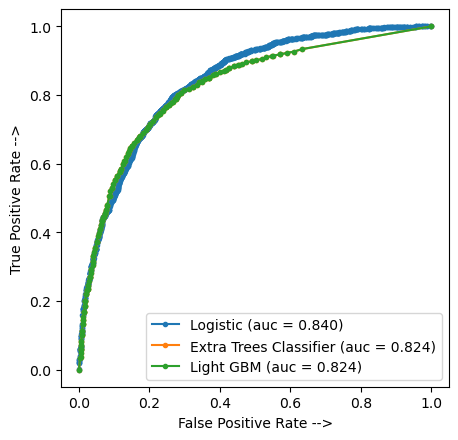

In [44]:
# Comparando AUC dos modelos ExtraTrees, LogisticRegression e LightGBM
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(et_fpr,et_tpr, marker='.', label='Extra Trees Classifier (auc = %0.3f)' % auc_et)
plt.plot(lightgbm_fpr,lightgbm_tpr, marker='.', label='Light GBM (auc = %0.3f)' % auc_lightgbm)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

A exigência da PUC Minas é de, no mínimo, três modelos de ML. Conforme demonstramos abaixo, o RandomForest gera basicamente o mesmo resultado do ExtraTrees. Dessa forma, utilizaremos, na versão a ser apresentada, os modelos ExtraTrees, LogisticRegression e  LightGBM.

In [40]:
#Modelo RandomForest
rfm = RandomForestClassifier()
rfm = rfm.fit(xtreinamento, ytreinamento)
tp_rfm = rfm.predict(xteste)
print("Accuracy Score:", accuracy_score(yteste, tp_rfm))
print(classification_report(yteste, tp_rfm))

Accuracy Score: 0.7370507399577167
              precision    recall  f1-score   support

       False       0.69      0.88      0.77      1892
        True       0.83      0.60      0.69      1892

    accuracy                           0.74      3784
   macro avg       0.76      0.74      0.73      3784
weighted avg       0.76      0.74      0.73      3784



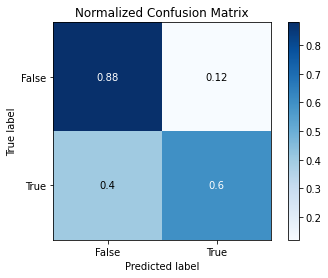

In [41]:
skplt.metrics.plot_confusion_matrix(yteste, tp_rfm, normalize=True)
plt.show()

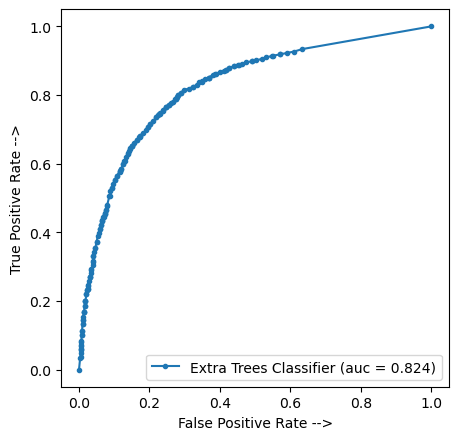

In [42]:
y_pred_rfm = rfm.predict_proba(xteste)
rfm_fpr,rfm_tpr,thereshold = roc_curve(yteste,y_pred_et[:,1]) 
auc_rfm = auc(rfm_fpr,rfm_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfm_fpr,rfm_tpr, marker='.', label='Extra Trees Classifier (auc = %0.3f)' % auc_rfm)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Apêndice: testes mostrando variações que não foram aproveitadas no ML acima

# 1) Tentativa sem a coluna CEP

In [ ]:
df_sem_cep = df_ml1[['Regiao','UF','CNAE','Atendida','CodAssunto','SexoConsumidor','FaixaEtaria','InscritoDAU']]

In [ ]:
df_sem_cep

In [ ]:
df_sem_cep = pd.get_dummies(df_sem_cep[['Regiao', 
                          'UF',                         
                          'CNAE',
                          'Atendida',                     
                          'CodAssunto',
                          'SexoConsumidor',
                          'FaixaEtaria','InscritoDAU']])

In [ ]:
df_sem_cep.shape # a do ml1 tinha 6922 colunas

In [ ]:
Xdf_sem_cep = df_sem_cep.drop(['Atendida'],axis=1) 
ydf_sem_cep = df_sem_cep.Atendida
smt = SMOTE()
Xdf_sem_cep_os,ydf_sem_cep_os = smt.fit_sample(Xdf_sem_cep,ydf_sem_cep) #os de oversampled
counter = Counter(ydf_sem_cep_os)
print(counter)

In [ ]:
#Train_test_split nessa oversampled
# especificamos o tamanho do test_size = 0.3 pq assim as True/False do ytreinamento e True/False do yteste ficam iguais
xtreinamentodf_sem_cep, xtestedf_sem_cep, ytreinamentodf_sem_cep, ytestedf_sem_cep = train_test_split(Xdf_sem_cep_os,ydf_sem_cep_os, test_size = 0.3, stratify=ydf_sem_cep_os,random_state = 0) #_os de oversampled

# ML do df_sem_cep

In [ ]:
#Retomamos os train_test_split a partir do oversample ("_os") que já tínhamos feito
#xtreinamentodf_sem_cep, xtestedf_sem_cep, ytreinamentodf_sem_cep, ytestedf_sem_cep= train_test_split(Xdf_sem_cep_os,ydf_sem_cep_o, random_state = 0) 

In [ ]:
# Modelo Extra Trees Classifier
etdf_sem_cep = ExtraTreesClassifier(random_state=0)
etdf_sem_cep = etdf_sem_cep.fit(xtreinamentodf_sem_cep, ytreinamentodf_sem_cep)
print("Acurácia de treinamento: ", etdf_sem_cep.score(xtreinamentodf_sem_cep, ytreinamentodf_sem_cep))
Train_predict_etdf_sem_cep = etdf_sem_cep.predict(xtestedf_sem_cep)
print("Acurácia de previsão: ", accuracy_score(ytestedf_sem_cep, Train_predict_etdf_sem_cep))
print(classification_report(ytestedf_sem_cep, Train_predict_etdf_sem_cep))

In [ ]:
# Modelo Logistic Regression
lrdf_sem_cep = LogisticRegression(random_state=0)
lrdf_sem_cep = lrdf_sem_cep.fit(xtreinamentodf_sem_cep, ytreinamentodf_sem_cep)
print("Acurácia de treinamento: ", lrdf_sem_cep.score(xtreinamentodf_sem_cep, ytreinamentodf_sem_cep))
Train_predict_lrdf_sem_cep = lrdf_sem_cep.predict(xtestedf_sem_cep)
print("Acurácia de previsão: ", accuracy_score(ytestedf_sem_cep, Train_predict_lrdf_sem_cep))
print(classification_report(ytestedf_sem_cep, Train_predict_lrdf_sem_cep))

In [ ]:
# Modelo Light Gradient Boosting Machine
import lightgbm
from lightgbm import LGBMClassifier
lightgbmdf_sem_cep = LGBMClassifier(random_state=0)
lightgbmdf_sem_cep = lightgbmdf_sem_cep.fit(xtreinamentodf_sem_cep, ytreinamentodf_sem_cep)
print("Acurácia de treinamento: ", lightgbmdf_sem_cep.score(xtreinamentodf_sem_cep, ytreinamentodf_sem_cep))
Train_predict_lightgbmdf_sem_cep = lightgbmdf_sem_cep.predict(xtestedf_sem_cep)
print("Acurácia de previsão: ", accuracy_score(ytestedf_sem_cep, Train_predict_lightgbmdf_sem_cep))
print(classification_report(ytestedf_sem_cep, Train_predict_lightgbmdf_sem_cep))

# 2) Tentativa com LabelEncoder para as de alta cardinalidade

A melhor técnica dispõe que devemos criar label enconders para as variáveis de alta cardinalidade. Não obstante, as nossas variáveis categóricas não podem sofrer o enviesamento: um CNAE 8630502 não é 8630502 vezes melhor ou pior do que o CNAE 0000001. Adotar os label encoders para as varáveis verdadeiramente explicativas - CNAE e CodAssunto - implicaria em um descolamento com a realidade dos problemas dessa natureza.

In [ ]:
df_le = df_ml1 #leia-se "dataframe label encoder" 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_le.nunique()

In [ ]:
colunascategoricas = df_le.select_dtypes('object').columns
colunascategoricas

In [ ]:
for col in colunascategoricas:
    df_le[col+'_encoded'] = LabelEncoder().fit_transform(df_le[col])

In [ ]:
df_le

In [ ]:
# Para definir as colunas que permanecerem no nosso nosso dataframe selecionaremos: 
# para de alta cardinalidade, mantemos LabelEncoder; 
# para as de baixa e média, criaremos dummies

In [ ]:
df_le = df_le[['Regiao','UF','CNAE_encoded','Atendida','CodAssunto_encoded','SexoConsumidor','FaixaEtaria','CEP_encoded','InscritoDAU']]

In [ ]:
df_le

In [ ]:
# Pois bem, vamos agora criar dummies para 'Regiao' (5 unique), 'UF' (15), SexoConsumidor' (2) e FaixaEtaria (7)

In [ ]:
df_le_du = pd.get_dummies(df_le,
                         columns = ['Regiao',
                                    'UF',
                                    'SexoConsumidor',
                                    'FaixaEtaria'],
                          prefix = ['Regiao',
                                    'UF',
                                    'SexoConsumidor',
                                    'FaixaEtaria'],
                          prefix_sep = '_' )                        
                                    

In [ ]:
df_le_du.info()

In [ ]:
df_le_du # leia-se df label encoder com dummies

In [ ]:
df_le_du.info()

_________________
Agora, então, temos dummies para as de baixa e média cardinalidade:  'Regiao' (5 unique), 'UF' (15 unique), SexoConsumidor' (2 unique) e 'FaixaEtaria' (7); e label encoder para as de alta cardinalidade 'CNAE_encoded' (368 unique), 'CodAssunto_encoded'(175 unique) e CEP (6354 unique)

In [ ]:
Xdf_le_du = df_le_du.drop(['Atendida'],axis=1) 
ydf_le_du = df_le_du.Atendida
smt = SMOTE()
Xdf_le_du_os,ydf_le_du_os = smt.fit_sample(Xdf_le_du,ydf_le_du) #os de oversampled
counter = Counter(ydf_le_du_os)
print(counter)

In [ ]:
#Train_test_split nessa oversampled
# especificamos o tamanho do test_size = 0.3 pq assim as True/False do ytreinamento ficam iguais e as 
#True/False do yteste também ficam iguais
xtreinamentodf_le_du, xtestedf_le_du, ytreinamentodf_le_du, ytestedf_le_du = train_test_split(Xdf_le_du_os,ydf_le_du_os, test_size = 0.3, stratify=ydf_le_du_os,random_state = 0) #_os de oversampled

In [ ]:
#Retomamos os train_test_split a partir do oversample ("_os") que já tínhamos feito
#xtreinamentodf_le_du, xtestedf_le_du, ytreinamentodf_le_du, ytestedf_le_du = train_test_split(Xdf_le_du_os,ydf_le_du_os, test_size = 0.3, stratify=ydf_le_du_os,random_state = 0) #_os de oversampled

# ML do df_le_du ("df label encoder dummies")

In [ ]:
# Modelo Extra Trees Classifier
etdf_le_du = ExtraTreesClassifier(random_state=0)
etdf_le_du = etdf_le_du.fit(xtreinamentodf_le_du, ytreinamentodf_le_du)
print("Acurácia de treinamento: ", etdf_le_du.score(xtreinamentodf_le_du, ytreinamentodf_le_du))
Train_predict_etdf_le_du = etdf_le_du.predict(xtestedf_le_du)
print("Acurácia de previsão: ", accuracy_score(ytestedf_le_du, Train_predict_etdf_le_du))
print(classification_report(ytestedf_le_du, Train_predict_etdf_le_du))

In [ ]:
# Modelo Logistic Regression
lrdf_le_du = LogisticRegression(random_state=0)
lrdf_le_du = lrdf_le_du.fit(xtreinamentodf_le_du, ytreinamentodf_le_du)
print("Acurácia de treinamento: ", lrdf_le_du.score(xtreinamentodf_le_du, ytreinamentodf_le_du))
Train_predict_lrdf_le_du = lrdf_le_du.predict(xtestedf_le_du)
print("Acurácia de previsão: ", accuracy_score(ytestedf_le_du, Train_predict_lrdf_le_du))
print(classification_report(ytestedf_le_du, Train_predict_lrdf_le_du))

In [ ]:
#Modelo Light Gradient Boosting Machine
import lightgbm
from lightgbm import LGBMClassifier
lightgbmdf_le_du = LGBMClassifier(random_state=0)
lightgbmdf_le_du = lightgbmdf_le_du.fit(xtreinamentodf_le_du, ytreinamentodf_le_du)
print("Acurácia de treinamento: ", lightgbmdf_le_du.score(xtreinamentodf_le_du, ytreinamentodf_le_du))
Train_predict_lightgbmdf_le_du = lightgbmdf_le_du.predict(xtestedf_le_du)
print("Acurácia de previsão: ", accuracy_score(ytestedf_le_du, Train_predict_lightgbmdf_le_du))
print(classification_report(ytestedf_le_du, Train_predict_lightgbmdf_le_du))

Não obstante melhorar o desempenho dos modelos Extra Trees e LightGBM, houve piora no modelo escolhido, o de Regressão Logística.